## 1

### 1. Draw a network with:
* 2 inputs
* 1 hidden layers with 4 hidden units and a 
* 1-class output (for binary classification)

## Solution

#### Network
* nodeX1 points to h1, h2, h3, h4 with weight w11, w12, w13, w14 respectively
* nodeX2 points to h1, h2, h3, h4 with weight w21, w22, w23, w24  respectively
* h1, h2, h3, h4 point to Y with v1, v2, v3, v4 respectively
* bias is igonored in network but will be present in equation

### 2. Write out the mathematical equation for the output of this network (feel free to break the input-output relationship into multiple equations).

* a1 = w11x1 + w21x2 + b1
* a2 = w12x1 + w22x2 + b2
* a3 = w13x1 + w23x2 + b3
* a4 = w14x1 + w24x2 + b4

* h1 = ReLu(a1)
* h2 = ReLu(a2)
* h3 = ReLu(a3)
* h4 = ReLu(a4)

* y = Sigmoid(v1h1+v2h2+v3h3+v4h4+c)

### 3. Write out the forward-pass function in python, call it ff nn ReLu(...)

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#define activation function and output function
sigmoid = tf.nn.sigmoid
relu = tf.nn.relu

def nn_layer(x, w, b, f):
    return f(tf.matmul(x,w) + b)

def nn_2layers(x, params, f_hidden, f_out):
    '''
    transformation for simple 2 layer neural net (hidden + output layers)

    x: array of inputs
    params: list of parameter arrays: [w_1, b_1, w_2, b_2]
    f_hidden: activation function on the hidden layer
    f_out: output function on the output layer
    '''
    h = nn_layer(x, params[0], params[1], f_hidden)
    yhat = nn_layer(h, params[2], params[3], f_out)
    return yhat

### 4. what are the class probabilities associated with the forward pass of each sample?

In [3]:
#initialize the data using np and tf
W = np.array([[1,-1,0,1],[0,0,0.5,1]])
W = tf.constant(W, dtype=tf.float32)
V = np.array([[1],[0],[-1],[1]])
V = tf.constant(V, dtype=tf.float32)
b = np.array([0, 0, 1, 0])
b = tf.constant(b, dtype=tf.float32)
c = np.array([1])
c = tf.constant(c, dtype=tf.float32)
X = np.array([[1,-1], [0,-1], [0,1]])
X = tf.constant(X, dtype=tf.float32)

In [4]:
yhat = nn_2layers(X, [W, b, V, c], relu, sigmoid)

In [5]:
#the class probability for each sample
yhat

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.81757444],
       [0.62245935],
       [0.62245935]], dtype=float32)>

## 2

### 1.What are the partial derivatives of f with respect to x and to y?

* df_dx = -3x^2 + 100x - 200y^2
* df_dy = 800y^3 - 400xy

### 2. Create a visualization of the contours of this function.

In [6]:
from __future__ import division
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
import random

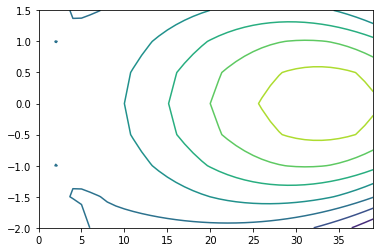

In [25]:
# delta = 2
x = np.arange(0, 40, 1)
y = np.arange(-2, 2, 0.5)
X, Y = np.meshgrid(x, y)
Z = (3 - X**3) + 50* ((2*(Y**2) - X)**2)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

### 3. Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [26]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*(x**2) + 100*x - 200*(y**2)
    df_dy = 800*(y**3) - 400*x*y
    return np.array([df_dx, df_dy])

In [44]:
def grad_descent(starting_point=None, iterations=10, learning_rate=1):
    if starting_point is None:
        point = np.random.uniform(-10, 10, size=2)
    else:
        point = starting_point
    
    trajectory = [point]
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
        
    return np.array(trajectory)

### Change learning rate

/Users/xiaoyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/xiaoyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/Users/xiaoyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/xiaoyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/Users/xiaoyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doin

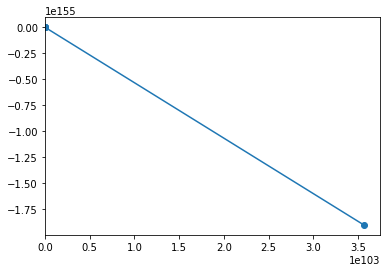

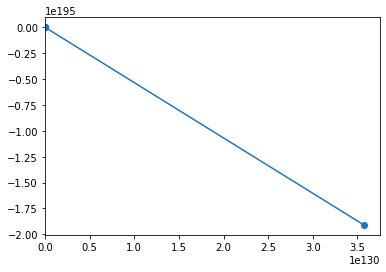

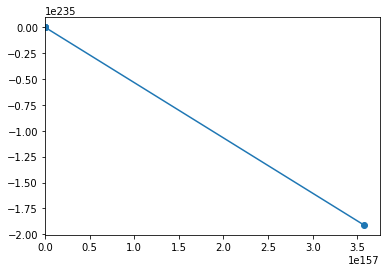

In [58]:
learning_rates = [0.1, 1, 10]
for learning_rate in learning_rates:
    np.random.seed(10)
    traj = grad_descent(iterations=10, learning_rate=learning_rate)

    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    x= traj[:,0]
    y= traj[:,1]
    plt.plot(x,y,'-o')

### Conclusion:
The function does not have a global minimum.

### 4. Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm’s hyperparameters.

In [22]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point is None:
        point = np.random.uniform(-10, 10, size=2)
    else:
        point = starting_point
    
    trajectory = [point]
    v= np.zeros(point.size)
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha * v + epsilon * grad
        point = point - v
        trajectory.append(point)
        
    return np.array(trajectory)

/Users/xiaoyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/xiaoyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/Users/xiaoyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/Users/xiaoyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


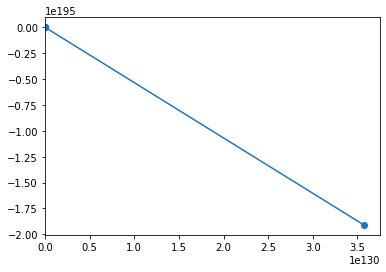

In [23]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, epsilon=1, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

#### increase epsilon to 9

/Users/xiaoyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/xiaoyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/Users/xiaoyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/Users/xiaoyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


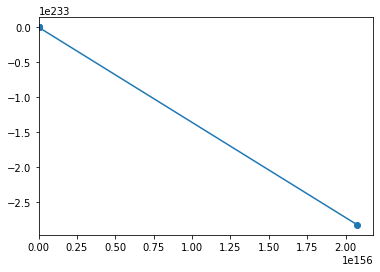

In [21]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, epsilon=9, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

#### decrease alpha to 0.1

/Users/xiaoyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/xiaoyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/Users/xiaoyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/Users/xiaoyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


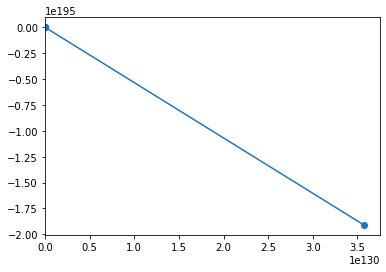

In [22]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, epsilon=1, alpha=0.1)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

### Conclusion:
gradient descent with momentum still cannot plot the trajectory very well due to the function itself.

## 3

### 1. For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.

$$ L = -ylog(y)-(1-y)log(1-y)$$

**Gradient of v:**

$$ \frac{dL}{dv_1} = \frac{dL}{d\hat{y}}h_1 = (\frac{y_i}{\hat{y_i}} - \frac{1- y_i}{1 - \hat{y_i}}) ReLu(w_{11} x_1 + w_{21}  x_2 + b_1)$$

$$ \frac{dL}{dv_2} = \frac{dL}{d\hat{y}}h_2 = (\frac{y_i}{\hat{y_i}} - \frac{1- y_i}{1 - \hat{y_i}}) ReLu(w_{12}  x_1 + w_{22}  x_2 + b_2)$$

$$ \frac{dL}{dv_3} = \frac{dL}{d\hat{y}}h_3 = (\frac{y_i}{\hat{y_i}} - \frac{1- y_i}{1 - \hat{y_i}}) ReLu(w_{13}  x_1 + w_{23} x_2 + b_3)$$

$$ \frac{dL}{dv_4} = \frac{dL}{d\hat{y}}h_4 = (\frac{y_i}{\hat{y_i}} - \frac{1- y_i}{1 - \hat{y_i}}) ReLu(w_{14}  x_1 + w_{24}  x_2 + b_4)$$


**Gradient of bias c:**

$$ \frac{dL}{dc} = \frac{dL}{d\hat{y}} \frac{d\hat{y}}{dc} = (\frac{y_i}{\hat{y_i}} - \frac{1- y_i}{1 - \hat{y_i}}) \frac{d\hat{y}}{dc} = (\frac{y_i}{\hat{y_i}} - \frac{1- y_i}{1 - \hat{y_i}}) \frac{d(Sigmoid(v_1h_1+v_2h_2+v_3h_3+v_4h_4+c))}{dc} $$

**Gradient of weight w:**
$$ \frac{dL}{dw_{1i}} = \frac{dL}{d\hat{y}} \frac{d\hat{y}}{dh_i} \frac{dh_i}{d(w_{1i}x_1 + w_{2i}x_2 + b_i)} \frac{d(w_{1i}x_1 + w_{2i}x_2 + b_i)} {dw_{1i}}$$

$$ \frac{dL}{dw_{2i}} = \frac{dL}{d\hat{y}} \frac{d\hat{y}}{dh_i} \frac{dh_i}{d(w_{1i}x_1 + w_{2i}x_2 + b_i)} \frac{d(w_{1i}x_1 + w_{2i}x_2 + b_i)} {dw_{2i}}$$

where $$ h_i = Relu(w_{1i}x_1 + w_{2i}x_2 + b_i)$$


**Gradient of bias b:**

$$ \frac{dL}{db_i} = \frac{dL}{d\hat{y}} \frac{d\hat{y}}{dh_i} \frac{dh_i}{d(w_{1i}x_1 + w_{2i}x_2 + b_i)} \frac{d(w_{1i}x_1 + w_{2i}x_2 + b_i)} {db_i}$$


where $$ h_i = Relu(w_{1i}x_1 + w_{2i}x_2 + b_i)$$

### 2. Write a function grad_f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [66]:
def loss(y, y_hat):
    # binary cross entropy
    return  np.sum(- (y*np.log(y_hat) + (1-y)*np.log(1 - y_hat)))

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(x,0)

def relu_derivative(x):
    return np.where(x>0, 1, 0)

def yhat(x, W, b, v, c):
    # returns model prediction 
    h = relu(np.dot(x,W) + b)
    y = sigmoid(np.dot(h,v) + c)
    return y

def binary_xent_residual(y, y_hat):
    return (y/y_hat - (1-y)/(1-y_hat))

def pack_params(param_vec):
    w_11, w_12, w_13, w_14, w_21, w_22, w_23, w_24, b_1, b_2,b_3, b_4, v_1, v_2, v_3, v_4, c = param_vec
    W = np.array([[w_11, w_12, w_13, w_14],[w_21, w_22, w_23, w_24]])
    b = np.array([b_1, b_2, b_3, b_4])
    v = np.array([v_1,v_2, v_3, v_4])
    c = np.array([c])
    return((W, b, v, c))

In [67]:
def grad_f(param_vec, x, y):
    
    W, b, v, c = pack_params(param_vec)
    
    a = np.dot(x,W)+b
    h = relu(a)
    y_a = np.dot(h,v)+c
    y_hat = sigmoid(y_a)
    
    dL_dc = np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a))
    
    dL_dv1 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,0])
    dL_dv2 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,1])
    dL_dv3 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,2])
    dL_dv4 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,3])
    
    dL_db1 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,0]))
    dL_db2 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,1]))
    dL_db3 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[2] * relu_derivative(a[:,2]))
    dL_db4 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[3] * relu_derivative(a[:,3]))

    dL_dw11 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,0]) * x[:,0])
    dL_dw12 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,1]) * x[:,0])
    dL_dw13 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[2] * relu_derivative(a[:,2]) * x[:,0])
    dL_dw14 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[3] * relu_derivative(a[:,3]) * x[:,0])
    
    dL_dw21 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,0]) * x[:,1])
    dL_dw22 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,1]) * x[:,1])
    dL_dw23 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[2] * relu_derivative(a[:,2]) * x[:,1])
    dL_dw24 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[3] * relu_derivative(a[:,3]) * x[:,1])
    
    return np.array([dL_dw11, dL_dw12, dL_dw13, dL_dw14, 
                     dL_dw21, dL_dw22, dL_dw23, dL_dw24, 
                     dL_db1, dL_db2, dL_db3, dL_db4,
                     dL_dv1, dL_dv2, dL_dv3, dL_dv4,
                     dL_dc])



In [80]:
def grad_descent(x, y,  iterations=10, learning_rate=1e-2):
    point = np.random.uniform(-.1,.1,size=17).astype("float128")
    trajectory = [point]
    losses = [loss(y, yhat(x, *pack_params(point)))]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point + learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)

### 3. Generate a synthetic dataset like the XOR pattern (see below).

In [81]:
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y=np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1

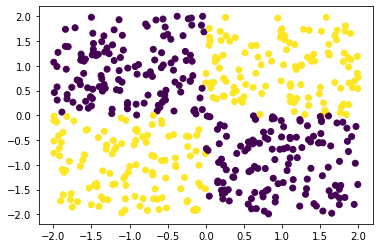

In [82]:
plt.scatter(x[:,0],x[:,1],c=y)

### 4. Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

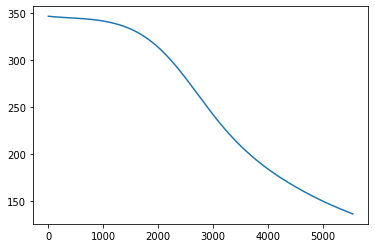

In [83]:
traj, losses = grad_descent(x, y, iterations=5550,learning_rate=1e-2)
plt.plot(losses)

### 5. Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.

In [85]:
def grad_descent(x, y, starting_point=None, iterations=10, learning_rate=1e-2):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-.1,.1,size=17).astype("float128")
    trajectory = [point]
    losses = [loss(y, yhat(x, *pack_params(point)))]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        v = alpha * v + epsilon * grad
        point = point - v
        trajectory.append(point)
        losses.append(loss(y, yhat(x,y,point)))
    return (np.array(trajectory), losses)

/Users/xiaoyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/xiaoyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/xiaoyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/xiaoyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/Users/xiaoyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.
/Users/xiaoyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: inv

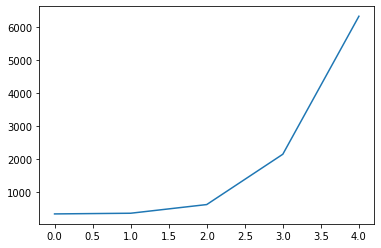

In [90]:
traj, losses = grad_descent_with_momentum(x, y, iterations=50, alpha=.9, epsilon=10)
plt.plot(losses)

### Conclusion:
It seems like my momentum methods didn't converge at all, it only has a few valid trajectory and most of the trajectory are null value, so the model failed.


### 6. Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.

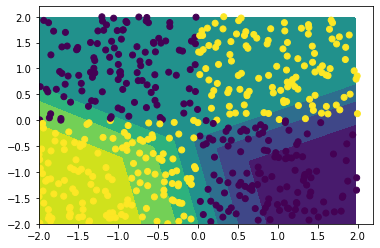

In [74]:
#the result using normal gradient descent
delta = 0.025
x1 = np.arange(-2.0, 2.0, delta)
x2 = np.arange(-2.0, 2.0, delta)
X1, X2 = np.meshgrid(x1, x2)
YHAT = yhat(np.array((X1.ravel(),X2.ravel())).T, *pack_params(traj[-1])).reshape((160,160))
fig, ax = plt.subplots()
CS = ax.contourf(X1, X2, YHAT)

plt.scatter(x[:,0],x[:,1],c=y)